In [1]:
import numpy as np
import scipy.special as sspec
import scipy.stats as ss
import scipy.linalg as sl
# import multiprocessing as mp
import time

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
def drift(x):
    # out = -x**3 + 4*x
    out = 3*x - 2*x**2 - x**3
    # out = np.sin(5*x)
    return out

g = 0.1

In [3]:
# set up grids of s and u values
smax = 100
sres = 5000
ds = 2*smax/sres
svec = -smax + ds*np.arange(sres)
uvec = np.copy(svec)

# set up integrand
alpha = 1.0
beta = ds**2/5
def f(x,s,h):
    return np.sqrt(beta*np.pi)*np.exp(1j*s*h*drift(x) - h*(np.abs(s)*g)**alpha - beta*(x**2)/4) 

In [4]:
ds

0.04

In [5]:
# set the value of h
thish = 0.01

# set the initial condition parameters
mymean = 0.0
mysd = 0.1

# set the initial pdf
def initp(x):
    return ss.norm.pdf(x,loc=mymean,scale=mysd)

# set the initial charfun
def initpcf(s):
    return np.exp(1j*mymean*s - 0.5*(mysd*s)**2)

In [6]:
# set up x grid for integration
Nx = 1024
L = 16
dx = L/Nx
xvec = np.arange(-L/2,L/2,dx)

In [7]:
# initialize kernel matrix
# kernelmat = np.zeros((sres,sres),dtype='D')

In [8]:
def computeonerow(i):
    
    outrow = np.zeros(sres,dtype='D')
    s = svec[i]
    
    # compute shifted coordinate
    k = s - uvec
        
    # compute integral for all values of u
    for j in range(Nx):
        
        # compute quadrature points
        x1 = xvec[j]
        x2 = x1 + dx
        
        # product quadrature rule
        m0 = np.divide((np.exp(1j*k*x2) - np.exp(1j*k*x1)), 1j*k, 
                       out=dx*np.ones_like(k,dtype='D'), where=k!=0)
        m1 = np.divide((x2*np.exp(1j*k*x2) - x1*np.exp(1j*k*x1)), 1j*k, 
                       out=0.5*(x2**2 - x1**2)*np.ones_like(k,dtype='D'), where=k!=0)
        m1 += np.divide((np.exp(1j*k*x2) - np.exp(1j*k*x1)), k**2, 
                        out=np.zeros_like(k,dtype='D'), where=k!=0)
        
        # compute quadrature weights
        w1 = -(m1 - x2*m0)/dx
        w2 = (m1 - x1*m0)/dx
        
        # compute integral over [x1, x2]
        outrow += w1*f(x1,s,thish) + w2*f(x2,s,thish)
    
    outrow /= (2.0*np.pi)
    
    # add asymptotic correction
    asymp = -(k**2)/beta - thish*(np.abs(s*g)**alpha) - ((beta*L - 4j*k)/(4*np.sqrt(beta)))**2
    asymp2 = np.log(sspec.wofz(1j*(beta*L - 4j*k)/(4*np.sqrt(beta))))
    asymp3 = 2*np.sqrt(beta*np.pi)
    totalasymp = 2.0*np.real(np.exp(asymp + asymp2))/asymp3
    outrow += totalasymp
    
    return outrow


In [9]:
# print(sspec.wofz(1j*(beta*L - 4j*(-uvec))/(4*np.sqrt(beta))))
# print(np.exp( -uvec**2/beta ))
# computeonerow(100)

In [ ]:
curtime = time.time()
# pool = mp.Pool(processes=24)
# kernelmat = np.vstack(pool.map(computeonerow, range(sres)))
kernelmat = np.vstack(list(map(computeonerow, range(sres))))
timetaken = time.time() - curtime
print(timetaken)
# pool.close()


In [345]:
print(sl.norm(kernelmat,np.inf))

90.61098160095302


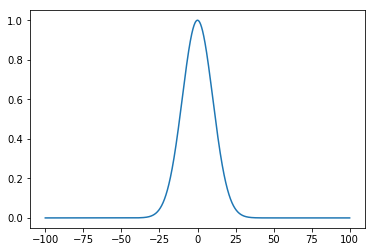

In [346]:
plt.plot(svec, np.abs(initpcf(svec)))

In [347]:
#xtest = np.array([-2, -1, 0, 1, 2])*ds
#colloc = np.zeros((5,5))
#for i in range(5):
#    for j in range(5):
#        colloc[i,j] = np.exp(-(xtest[i] - xtest[j])**2/beta)
        
smat,umat = np.meshgrid(svec,uvec)
colloc = np.exp(-(smat - umat)**2/beta)

31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.539156517 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565171 1.0 (1+0j)
31.5391565172 1.0 (1+0j)
31.5391565172 1.0 (1+0j)
31.5391565172 1.0 (1+0j)
31.5391565172 1.0 (1+0j)
31.5391565172 1.0 (1+0j)
31.5391565172 1.0 (1+0j)
31.5391565172 1.0 (1+0j)
31.5391565172 1.0 (1+0j)
31.539156517

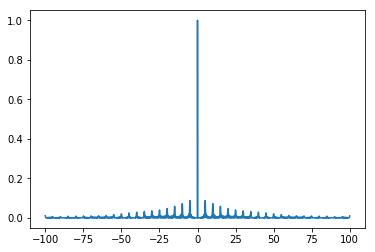

In [348]:
# cf = initpcf(svec)
coef = np.zeros(sres)
coef[sres//2] = 1
numsteps = 100
for i in range(numsteps):
    cf = np.dot(kernelmat,coef)

    # enforce property that psi(0) = 1 and |psi(s)| <= 1 always
    oldmax = np.abs(cf[sres//2])
    if np.max(cf) >= 1:
        cf /= cf[sres//2]
    print(oldmax, np.max(np.abs(cf)), cf[sres//2])
    
    # enforce Hermitian property
    cfreal = np.real(cf)
    cfimag = 0.5*(np.imag(cf) - np.flip(np.imag(cf),0))
    cf = cfreal + 1j*cfimag
    
    # compute collocation coefficients
    coef = sl.solve(colloc, cf)
    
plt.plot(svec, np.abs(cf))

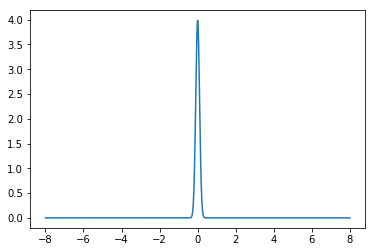

In [349]:
# set up x grid for plotting
Lplot = 16
dxplot = 1/(sres*ds)
xplot = np.arange(-Lplot/2,Lplot/2,dxplot)
Nxplot = xplot.shape[0]

# initial PDF
plt.plot(xplot, initp(xplot))

In [350]:
# Fourier matrix
fouriermat = np.zeros((Nxplot,sres),dtype='D')
for i in range(Nxplot):
    fouriermat[i,] = np.exp(-1j*uvec*xplot[i])/(2.0*np.pi)


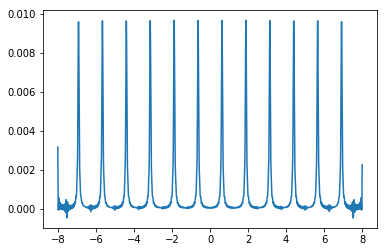

In [351]:
# PDF at next time step
plt.plot(xplot, np.real(dxplot*np.dot(fouriermat,cf)))
# plt.axvline(x=-np.pi/5,color='m')
# plt.axvline(x=np.pi/5,color='m')

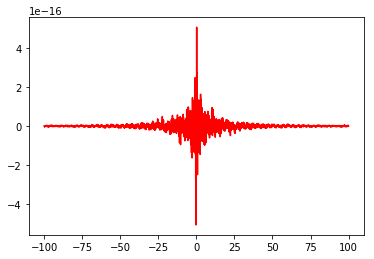

In [352]:
plt.plot(svec,np.imag(cf),color='r')